In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
%matplotlib inline

In [2]:
data = pd.read_csv("univariate_linear_regression_dataset.csv",names=["X","Y"])
n_samples = data.shape[0]
x = np.array(data.X).reshape((n_samples,1))
y = np.array(data.Y).reshape((n_samples,1))

<Axes: xlabel='X', ylabel='Y'>

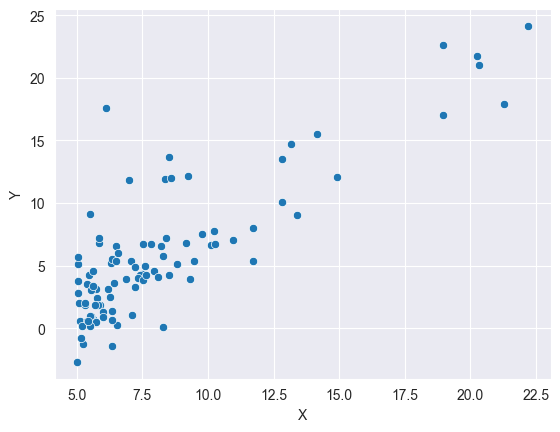

In [3]:
sns.scatterplot(x=data.X,y=data.Y)

##### add the biais column:

In [4]:
X = np.hstack((x,np.ones_like(x)))
theta = np.random.randn(2,1)
theta

array([[-0.69377882],
       [ 0.55470371]])

In [5]:
def f(X:np.array,theta:np.array)->np.array:
    return X.dot(theta)

def erreur_somme_des_distances(X:np.array,y:np.array,theta:np.array)-> float:
    m = len(y)
    return 1/(2*m)*np.sum((f(X,theta)-y))

def gradient(X:np.array,y:np.array,theta:np.array):
    m = len(y)
    return 1/m*X.T.dot(f(X,theta)-y)
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    # creation d'un tableau de stockage pour enregistrer l'evolution des erreurs
    historique_des_erreurs = np.zeros(n_iterations)
    print("begin learning")
    for i in range(0,n_iterations):
        theta -= learning_rate*gradient(X,y,theta)
        historique_des_erreurs[i] = erreur_somme_des_distances(X,y,theta)
    print("learning ended")
    return theta,historique_des_erreurs

begin learning
learning ended
[[ 1.19303364]
 [-3.89578081]]


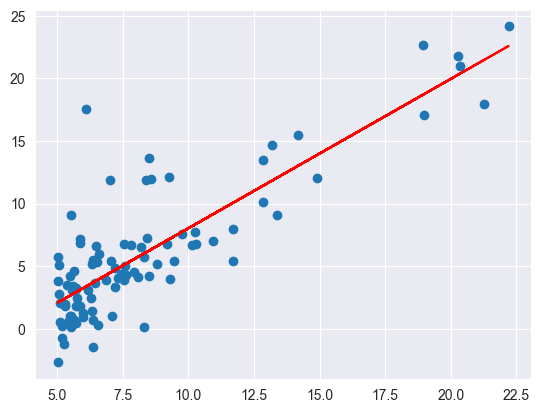

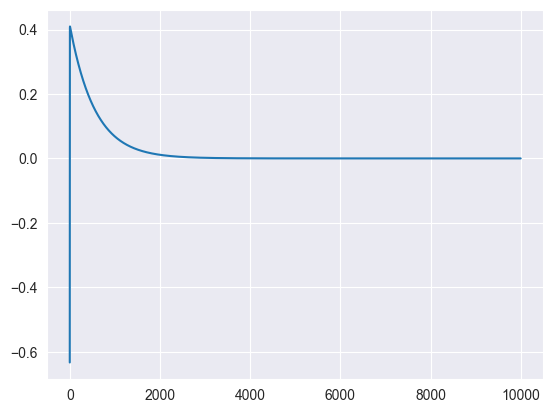

[22.94747603]


In [6]:
n_iterations = 10000
learning_rate = 0.01 # modifier pour voir l'effet
theta_final, historique_des_erreurs=gradient_descent(X, y, theta, learning_rate, n_iterations)
print(theta_final) # theta une fois que la machine a été entrainée
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = f(X, theta_final)
# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')
plt.show()
plt.figure()
plt.plot(range(n_iterations), historique_des_erreurs)
plt.show()
print(f(np.array([22.5,1]), theta_final))

### Regression Polynomial:

In [7]:
def afficher_pol(LPol):
    L = LPol[:]
    L.reverse()
    L = [round(e,2) for e in L]
    for i in range(len(L)):
        print(f'({L[i]}*X^{i})',end='+')


In [8]:
def evaluer_pol(LPol,x):
    S = 0
    L = LPol[:]
    L.reverse()
    for i in range(len(LPol)):
        S += L[i]*(x**i)
    return S

In [18]:
data_pol = pd.read_csv('./dataset_polynomial3.csv').values
x = data_pol[1:1001,0]
y = data_pol[1:1001,1]

In [30]:
degre_polynome = 3

In [31]:
p = np.poly1d(np.polyfit(x,y,degre_polynome))

In [32]:
LPol = list(p)

In [33]:
LPol

[1.2313817968064078,
 -7.384225069669068,
 13.533300726985386,
 -7.381098675005757]

In [34]:
afficher_pol(LPol)

(-7.38*X^0)+(13.53*X^1)+(-7.38*X^2)+(1.23*X^3)+

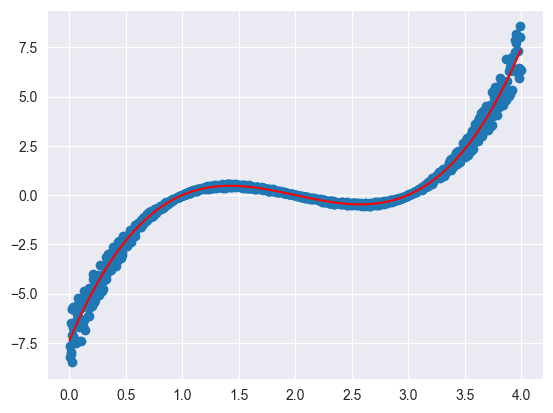

In [35]:
les_x = np.linspace(min(x),max(x),100)
plt.scatter(x,y)
plt.plot(les_x,p(les_x),c='r')
plt.show()